In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Vyom/Desktop/Mall Customer Segmentation/Mall Customer Dataset/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = data.drop('Gender', axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
from sklearn.preprocessing import StandardScaler

X = df.values[:, 1:]
X = np.nan_to_num(X)
scaled_dataset = StandardScaler().fit_transform(X)
scaled_dataset

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [8]:
from sklearn.cluster import KMeans

nums_cluster = 3
k_means = KMeans(n_clusters = nums_cluster, n_init = 12)
k_means.fit(scaled_dataset)
labels = k_means.labels_

print(labels)

[1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2
 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 2 1 1 1 2 2 2 2 1 2 0 0 1 0 2 0 2 0 2 0 1 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0]


In [9]:
df['Labels'] = labels
df.sample(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
171,172,28,87,75,0
26,27,45,28,32,2
132,133,25,72,34,1
124,125,23,70,29,1
62,63,67,47,52,2
78,79,23,54,52,1
145,146,28,77,97,0
34,35,49,33,14,2
159,160,30,78,73,0
149,150,34,78,90,0


In [10]:
df.groupby('Labels').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Labels,,,,
0,161.951220,32.853659,87.341463,79.975610
1,60.573529,25.838235,42.750000,53.647059
2,102.648352,51.274725,61.802198,34.208791


In [11]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Labels'],
      dtype='object')

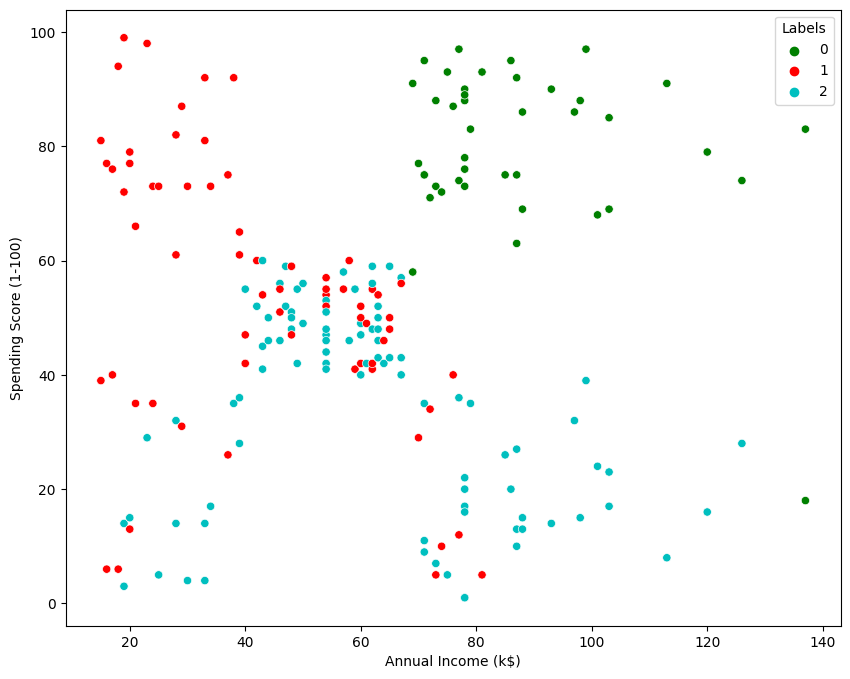

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=df, palette=['g', 'r', 'c'])
plt.show()